In [1]:
import pandas as pd
import numpy as np
import os
os.chdir(r"C:\Users\dai\Desktop\S-AI\MachineLearning\Day12\Datasets")
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import SimpleExpSmoothing

In [13]:
beer = pd.read_csv('monthly-beer-production-in-austr.csv',index_col=0)

In [15]:
beer.shape

(476, 1)

In [17]:
beer.head()

,Monthly beer production
Month,
1956-01,93.2
1956-02,96.0
1956-03,95.2
1956-04,77.1
1956-05,70.9


<Axes: xlabel='Month'>

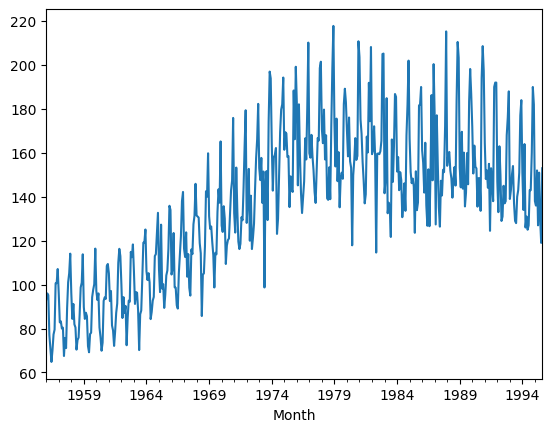

In [87]:
y = beer['Monthly beer production']
y_train = y[:-24]
y_test = y[-24:]
y.plot()

In [89]:
y_train.shape, y_test.shape

((452,), (24,))

In [106]:
holt = Holt(y_train, exponential=True)
alpha, beta = 0.2, 0.4
fit3 = holt.fit(smoothing_level=alpha, smoothing_trend= beta) #smoothing_level=alpha, smoothing_trend= beta
fcast3 = fit3.forecast(len(y_test))

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


## Monthly Beer Production

In [111]:
#alpha, beta, gamma = 0.2,0.1, 0.9 
hw_m = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add', seasonal ='add',damped_trend=True)
fit3 = hw_m.fit() #smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal = gamma
fcast3 = fit3.forecast(len(y_test))
hw_m_fcast = pd.Series(fcast3, index= y_test.index)
error = round(root_mean_squared_error(y_test, hw_m_fcast), 2)
plt.text(4,180, "RMSE="+str(error))
plt.plot(hw_m_fcast,label= "HW damped trend forecast")
plt.plot(y_test, label = 'Test')
plt.legend(loc='best')
plt.show()

TypeError: float() argument must be a string or a real number, not 'Period'

ValueError: Image size of 2125x66582 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [113]:
beer = pd.read_csv("monthly-beer-production-in-austr.csv",index_col=0)
y = beer['Monthly beer production'] 
y.index = pd.DatetimeIndex(y.index).to_period("M")
type(y.index)


pandas.core.indexes.period.PeriodIndex

C:\Users\dai\AppData\Local\Temp\ipykernel_12344\1909857926.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  y_yearly = y.resample('Y').sum()


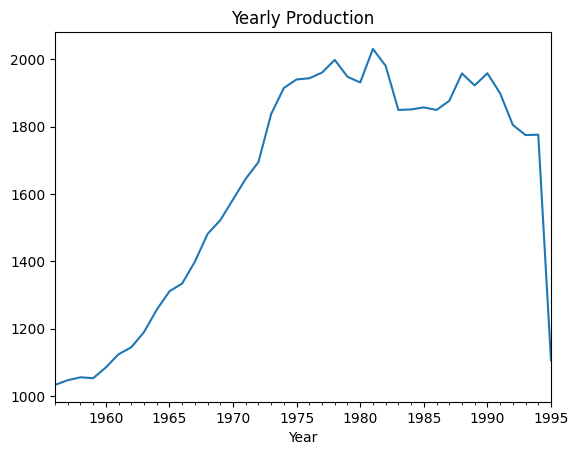

In [115]:
y_yearly = y.resample('Y').sum()
y_yearly.index.rename('Year',inplace= True)
y_yearly.plot()
plt.title("Yearly Production")
plt.show()

In [117]:
from scipy.special import boxcox, inv_boxcox
lamb = 0.1
y = beer['Monthly beer production']
y_trans = boxcox(y,lamb)
y_train = y_trans[:-24]
y_test = y_trans[-24:]
y_train.shape, y_test.shape

((452,), (24,))